# Assignment 1: Comparison between Feed-Forward Neural Networks and Convolutional Neuronal Networks

- **Student Name 1**: Ana Marija Ereš (anamarija.eres@alumnos.upm.es)
- **Student Name 2**: Ema Ilić (e.ilic@alumnos.upm.es)
- **Student Name 3**: Dominik Kos (dominik.kos@alumnos.upm.es)
- **Student Name 4**: Martin Sršen (martin.srsen@alumnos.upm.es)

The assignments should be done in groups of three people. Please write your names and emails in the above list now. 

In this assignment you have to solve an image classification problem. To this end you must train and compare two deep neuronal networks : a Feed Forward Neuronal Network (ffNN) with dense connections between layers and a Convolutional Neuronal Network (CNN).

We provide you with a very basic implementation of both networks, and encourage you to seek for the best design: How many layers? How many neurons per layer? What type of optimizer and activation function gives the better results? What regularization? Explain your decisions.

Please ensure that all your notebook cells can be correctly executed from scratch before submission. To do so, you can click in "Kernel" > "Restart and Run All".

To promote good results, we have created two challenges called "The ffNN challenge 2021" and "The CNN challenge 2021" where you must publish every good result that you obtain (keep in mind that the position in these competitions will determine 10% of your grade in this unit).

By March 22nd 2021, before 23:55, you have to upload to Moodle a brief presentation **in .PDF format** describing:

- The design of both networks
- The optimization process that you use
- The training and validation curves of each network
- How each decision you have made impacted on the accuracy
- The advantages of CNNs versus ffNNs

Some of you will present their results to the rest of the class on March 23rd. We will contact those selected in the morning of March 23rd.

NOTE: You DON'T have to upload the code in this deadline. There will be a final deadline on April 5th where you will have to upload all the code of the two parts of the assignment in this unit. Here, upload only your presentation **in .PDF format**.

# CIFAR 100 Dataset

To compare both types of networks we are going to use the CIFAR dataset, which contains 100 different object clases that the learnt networks should predict. Each sample of the dataset is a RGB image of size 32x32.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')


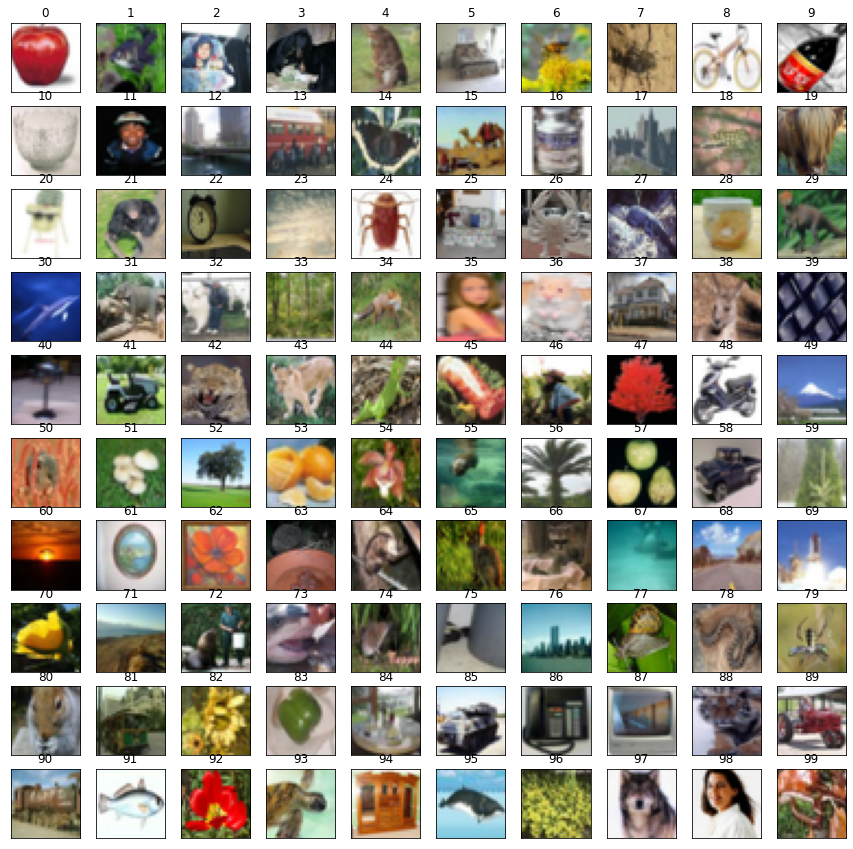

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [3]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from tensorflow.keras.utils import to_categorical
# Converts a class vector (integers) to binary class matrix
tr_labels = to_categorical(y_train, num_classes)
va_labels = to_categorical(y_val, num_classes)
te_labels = to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [4]:
# Tensorboard
from time import time
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Train a feed fordward Neuronal Network

The way to train a feed fordward network is to consider each of the pixels (in the three RGB channels) of the image an input neuron. Therefore, for an 32x32x3 image we will have 3072 input neurons. The network should have 100 neurons in the output layer (one per class) and the output will be the probability that the image belongs to each of the classes. 

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

mlp = Sequential()
mlp.add(Flatten(input_shape=(CIFAR_SIZE[0], CIFAR_SIZE[1], 3)))
mlp.add(Dense(32*32, kernel_regularizer=regularizers.l1_l2(l1=2e-5, l2=2e-4), bias_regularizer=regularizers.l2(2e-4), activity_regularizer=regularizers.l2(2e-5)))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(32*32, kernel_regularizer=regularizers.l1_l2(l1=2e-5, l2=2e-4), bias_regularizer=regularizers.l2(2e-4), activity_regularizer=regularizers.l2(2e-5)))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(32*32, kernel_regularizer=regularizers.l1_l2(l1=2e-5, l2=2e-4), bias_regularizer=regularizers.l2(2e-4), activity_regularizer=regularizers.l2(2e-5)))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(num_classes, kernel_regularizer=regularizers.l1_l2(l1=2e-5, l2=2e-4), bias_regularizer=regularizers.l2(2e-4), activity_regularizer=regularizers.l2(2e-5)))
mlp.add(Activation('softmax'))

opt = optimizers.SGD(lr=0.0012, decay=3e-6, momentum=0.9, nesterov=True)
#opt = optimizers.Adam(learning_rate=0.00008)
mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_69 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_70 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 1024)            

In [ ]:

data = mlp.fit(x_train, tr_labels, batch_size=32, epochs=220, verbose=2, validation_data=(x_val, va_labels), callbacks=[tensorboard])
mlp.save('./mlp-model')

Epoch 1/220
1250/1250 - 14s - loss: 7.5692 - accuracy: 0.0386 - val_loss: 7.2392 - val_accuracy: 0.0695
Epoch 2/220
1250/1250 - 12s - loss: 7.1652 - accuracy: 0.0762 - val_loss: 6.9743 - val_accuracy: 0.1020
Epoch 3/220
1250/1250 - 12s - loss: 6.9304 - accuracy: 0.1050 - val_loss: 6.7473 - val_accuracy: 0.1321
Epoch 4/220
1250/1250 - 12s - loss: 6.7547 - accuracy: 0.1224 - val_loss: 6.6011 - val_accuracy: 0.1492
Epoch 5/220
1250/1250 - 12s - loss: 6.6121 - accuracy: 0.1372 - val_loss: 6.4884 - val_accuracy: 0.1565
Epoch 6/220
1250/1250 - 12s - loss: 6.4874 - accuracy: 0.1500 - val_loss: 6.3849 - val_accuracy: 0.1615
Epoch 7/220
1250/1250 - 12s - loss: 6.3719 - accuracy: 0.1582 - val_loss: 6.2664 - val_accuracy: 0.1728
Epoch 8/220
1250/1250 - 12s - loss: 6.2666 - accuracy: 0.1693 - val_loss: 6.1783 - val_accuracy: 0.1849
Epoch 9/220
1250/1250 - 12s - loss: 6.1593 - accuracy: 0.1768 - val_loss: 6.0821 - val_accuracy: 0.1911
Epoch 10/220
1250/1250 - 12s - loss: 6.0702 - accuracy: 0.1841 -

Evaluate and measure the inference time:

In [68]:
loaded_mlpl = tf.keras.models.load_model('./mlp-model')

start = time()
loss, acc = loaded_mlpl.evaluate(x_test, te_labels, verbose=0)
end = time()
print('ffNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))


ffNN took 1.6970906257629395 seconds
Test loss: 4.760892868041992 - Accuracy: 0.3183000087738037


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


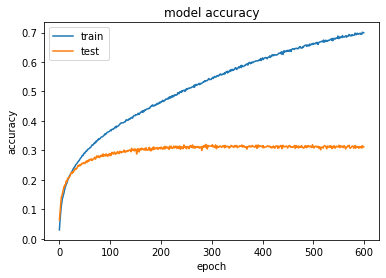

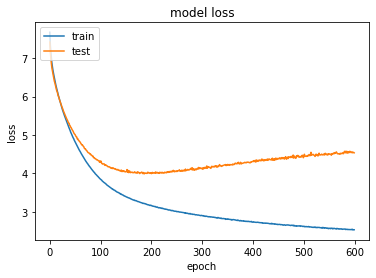

In [55]:
import matplotlib.pyplot as plt
import numpy as np

print(data.history.keys())
# summarize history for accuracy
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Train a convolutional Neuronal Network 

In [70]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras import optimizers, datasets, layers, models

input_shape = (CIFAR_SIZE[0], CIFAR_SIZE[1], 3)

cnn = Sequential()
num=8
for i in range(1, 5):
    cnn.add(Conv2D(num*i, kernel_size=(3, 3), padding='same', input_shape=input_shape, bias_regularizer=l2(0.01)))
    cnn.add(BatchNormalization())
    cnn.add(Activation('relu'))
    cnn.add(layers.AveragePooling2D((2, 2)))
    num=num*2
    
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(num_classes, bias_regularizer=l2(0.01)))
cnn.add(Activation('softmax'))

opt = optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_87 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
activation_134 (Activation)  (None, 32, 32, 8)         0         
_________________________________________________________________
average_pooling2d_60 (Averag (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 32)        2336      
_________________________________________________________________
batch_normalization_88 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_135 (Activation)  (None, 16, 16, 32)      

In [ ]:
data = cnn.fit(x_train, tr_labels, batch_size=16, epochs=20, verbose=2, validation_data=(x_val, va_labels))
cnn.save('./cnn-model')

Epoch 1/20
2500/2500 - 16s - loss: 3.6182 - accuracy: 0.1610 - val_loss: 3.1144 - val_accuracy: 0.2353
Epoch 2/20
2500/2500 - 13s - loss: 2.8833 - accuracy: 0.2831 - val_loss: 2.7017 - val_accuracy: 0.3204
Epoch 3/20
2500/2500 - 13s - loss: 2.5504 - accuracy: 0.3466 - val_loss: 2.6014 - val_accuracy: 0.3449
Epoch 4/20
2500/2500 - 13s - loss: 2.3275 - accuracy: 0.3948 - val_loss: 2.4582 - val_accuracy: 0.3800
Epoch 5/20
2500/2500 - 13s - loss: 2.1540 - accuracy: 0.4355 - val_loss: 2.3760 - val_accuracy: 0.3940
Epoch 6/20
2500/2500 - 13s - loss: 2.0047 - accuracy: 0.4678 - val_loss: 2.2275 - val_accuracy: 0.4268
Epoch 7/20
2500/2500 - 13s - loss: 1.8860 - accuracy: 0.4961 - val_loss: 2.2424 - val_accuracy: 0.4254
Epoch 8/20
2500/2500 - 13s - loss: 1.7812 - accuracy: 0.5203 - val_loss: 2.1913 - val_accuracy: 0.4462
Epoch 9/20
2500/2500 - 13s - loss: 1.6693 - accuracy: 0.5447 - val_loss: 2.3001 - val_accuracy: 0.4237
Epoch 10/20
2500/2500 - 13s - loss: 1.5812 - accuracy: 0.5638 - val_loss:

Evaluate and measure the inference time:

In [68]:
loaded_cnn = tf.keras.models.load_model('./cnn-model')

start = time()
loss, acc = loaded_cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

CNN took 1.5788731575012207 seconds
Test loss: 2.227642297744751 - Accuracy: 0.453000009059906


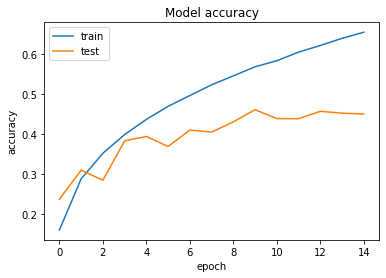

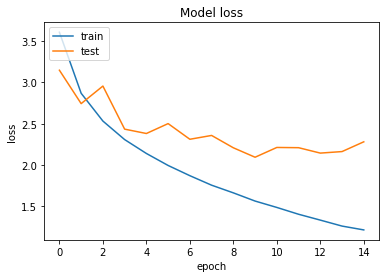

In [69]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()